In [67]:
import numpy
import matplotlib.pyplot as plt

In [68]:
plt.rcParams["figure.figsize"] = (8,6)

In [69]:
def predator_prey_function(x, y, a, b, c, d):
    return (a*x - b*x*y, -c*y + d*x*y)

## Метод Эйлера

In [70]:
def euler(iterations, initial, step, a=2/3, b=4/3, c=1, d=1):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        delta = predator_prey_function(x_val[-1], y_val[-1], a, b, c, d)
        delta_x = step*delta[0]
        delta_y = step*delta[1]
        
        new_x = x_val[-1]+delta_x
        new_y = y_val[-1]+delta_y
        
        x_val.append(new_x)
        y_val.append(new_y)
        
        t_val.append(t_val[-1] + step)
    return t_val, x_val, y_val

In [71]:
iterations = 31
initial = (0.9, 0.9)
step = 0.1

In [72]:
time_e, prey_e, predator_e = euler(iterations, initial, step)

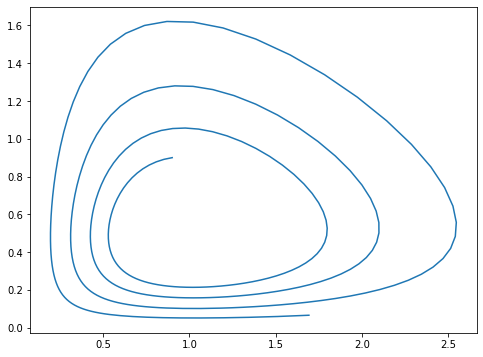

In [80]:
plt.plot(prey_e, predator_e)

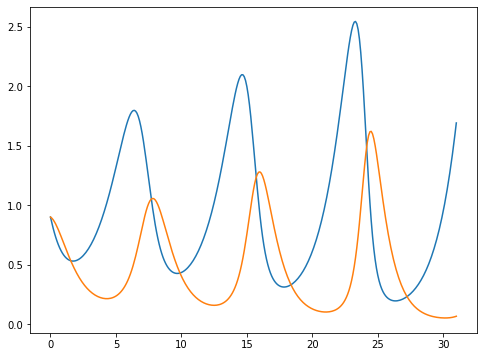

In [73]:
plt.plot(time_e, prey_e)
plt.plot(time_e, predator_e)

## Рунге-Кутта

In [74]:
def runge_kutta(iterations, initial, step, a=2/3, b=4/3, c=1, d=1):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x1, y1 = predator_prey_function(x_val[-1], y_val[-1], a, b, c, d)
        x2, y2 = predator_prey_function(x_val[-1]+step*x1/2, y_val[-1]+step*y1/2, a, b, c, d)
        x3, y3 = predator_prey_function(x_val[-1]+step*x2/2, y_val[-1]+step*y2/2, a, b, c, d)
        x4, y4 = predator_prey_function(x_val[-1]+step*x3, y_val[-1]+step*y3, a, b, c, d)
        
        x_val.append(x_val[-1]+step*(x1+2*x2+2*x3+x4)/6)
        y_val.append(y_val[-1]+step*(y1+2*y2+2*y3+y4)/6)
        t_val.append(t_val[-1] + step)
    return t_val, x_val, y_val

In [75]:
time_rk, prey_rk, predator_rk = runge_kutta(iterations, initial, step)

In [82]:
time_rk1, prey_rk1, predator_rk1 = runge_kutta(iterations, (1.2, 1.2), step)

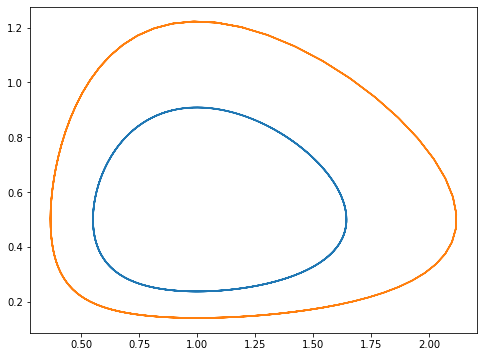

In [83]:
plt.plot(prey_rk, predator_rk)
plt.plot(prey_rk1, predator_rk1)

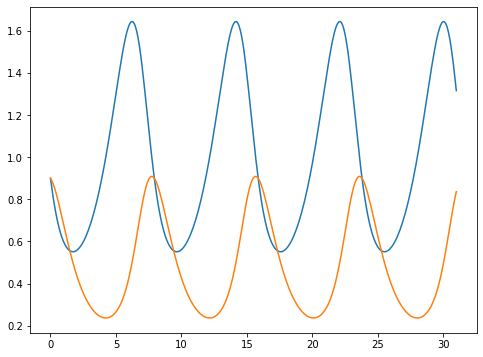

In [76]:
plt.plot(time_rk, prey_rk)
plt.plot(time_rk, predator_rk)

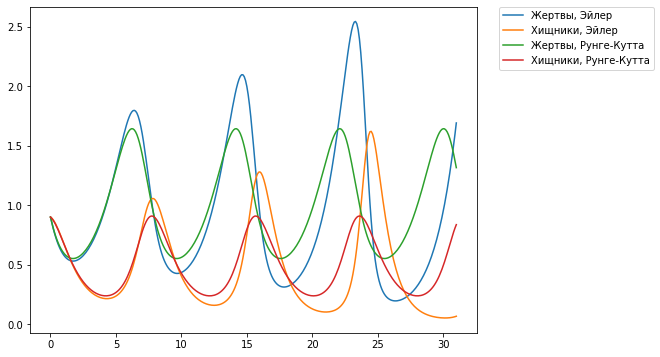

In [77]:
line1, = plt.plot(time_e, prey_e, label = 'Жертвы, Эйлер')
line2, = plt.plot(time_e, predator_e, label = 'Хищники, Эйлер')
line3, = plt.plot(time_rk, prey_rk, label = 'Жертвы, Рунге-Кутта')
line4, = plt.plot(time_rk, predator_rk, label = 'Хищники, Рунге-Кутта')
plt.legend(handles=[line1, line2, line3, line4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

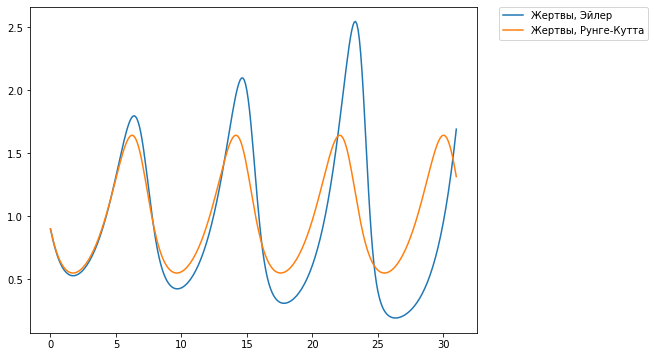

In [78]:
line1, = plt.plot(time_e, prey_e, label = 'Жертвы, Эйлер')
line3, = plt.plot(time_rk, prey_rk, label = 'Жертвы, Рунге-Кутта')
plt.legend(handles=[line1, line3])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

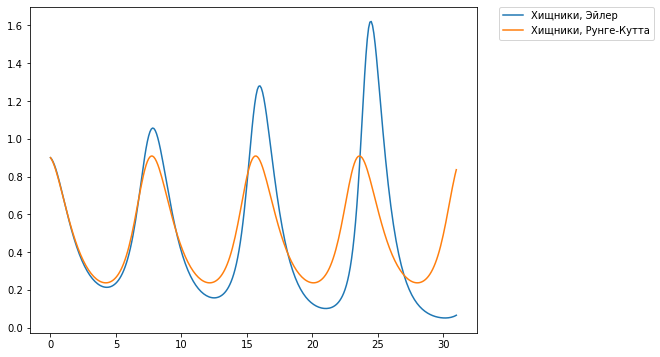

In [79]:
line2, = plt.plot(time_e, predator_e, label = 'Хищники, Эйлер')
line4, = plt.plot(time_rk, predator_rk, label = 'Хищники, Рунге-Кутта')
plt.legend(handles=[line2, line4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)